<center> <h3 style="background-color:#ADD8E6; color:black;">1. Importing Libraries</h3> </center>

In [3]:
import numpy as np 
import pandas as pd

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from pandas import DataFrame 

import seaborn as sns
import cv2
import matplotlib.pyplot as plt
import time

<center> <h3 style="background-color:#ADD8E6; color:black;">2. Data Exploration & Visualization</h3> </center>

In [4]:
train = pd.read_csv("C:/Users/Somaya/Desktop/fashion-mnist_train.csv")
test = pd.read_csv("C:/Users/Somaya/Desktop/fashion-mnist_test.csv")

In [5]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Checking for null values
train.isnull().sum().sum()

0

In [7]:
test.isnull().sum().sum()

0

In [8]:
label = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [9]:
# Extracting x_train and y_train from the dataset
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]
X_train.head(5)
y_train.head(5)

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

In [10]:
# Extracting x_test and y_test from the dataset
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]
X_test.head(5)
y_test.head(5)

0    0
1    1
2    2
3    2
4    3
Name: label, dtype: int64

C:\Users\Somaya\AppData\Local\Temp\ipykernel_13320\3828648237.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(label,rotation = 45)


[Text(0, 0, 'T-shirt/Top'),
 Text(1, 0, 'Trouser'),
 Text(2, 0, 'Pullover'),
 Text(3, 0, 'Dress'),
 Text(4, 0, 'Coat'),
 Text(5, 0, 'Sandal'),
 Text(6, 0, 'Shirt'),
 Text(7, 0, 'Sneaker'),
 Text(8, 0, 'Bag'),
 Text(9, 0, 'Ankle Boot')]

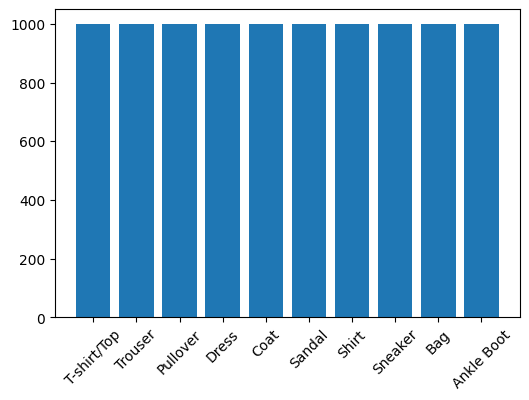

In [11]:
# Checking whether the data is equality distributed among all 10 classes
unique = np.unique(np.array(y_test), return_counts=True)
figure = plt.figure(figsize = (6,4))
barplot = figure.add_subplot(111)
barplot.bar(label,unique[1])
barplot.set_xticklabels(label,rotation = 45)

As shown in the above figure, the data is equally distributed among the classes, so we will not face any issues with unequal weights later on

<center> <h3 style="background-color:#ADD8E6; color:black;">Data Pre-processing</h3> </center>

In [12]:
# Normalizing the data
X_train /= 255
X_test /= 255

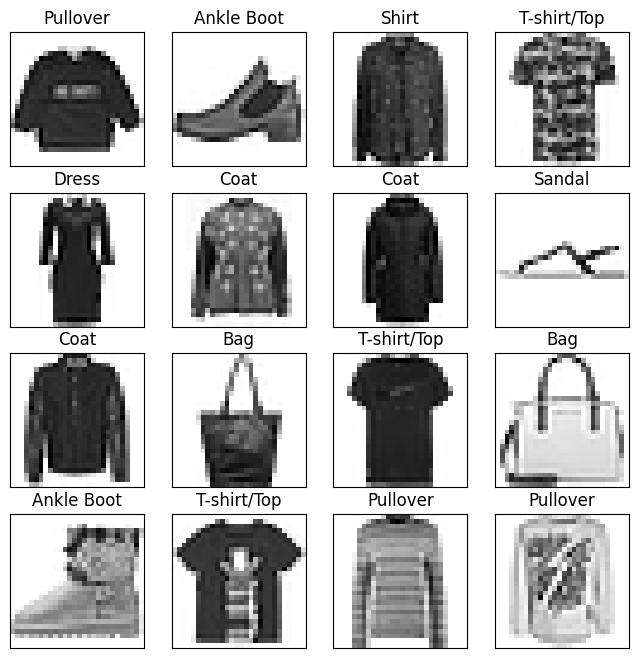

In [13]:
# Visualizing some images from the dataset
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.array(X_train.loc[i]).reshape((28,28)), cmap="binary")
    index = int(y_train[i])
    plt.title(label[index])
plt.show()

Text(0, 0.5, 'Cumulative Explained Variance')

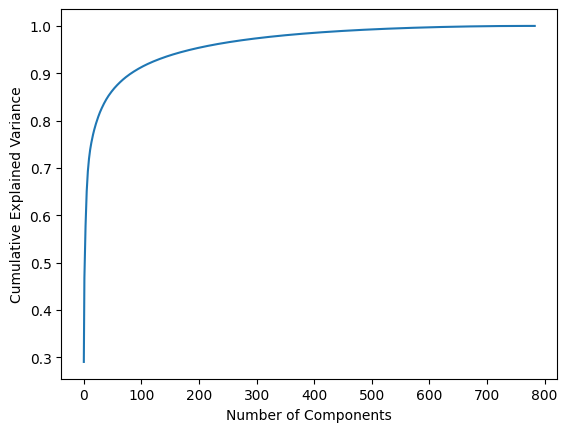

In [14]:
# Performing PCA, as shown by the plot 400 components explain around 98% of the variability in the data
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [15]:
# This gets the exact variability explained by 400 components
np.cumsum(pca.explained_variance_ratio_)[399]*100

98.53456865081405

In [16]:
# After choosing 400 components, we transform our data
pca = PCA(n_components=400)
pca.fit(X_train)
X_trainpca = pca.transform(X_train)
X_testpca = pca.transform(X_test)

<center> <h3 style="background-color:#ADD8E6; color:black;">Parameter Tuning</h3> </center>

In [17]:
# Parameter Tuning with rbf kernel
C = [0.1, 1, 8, 10, 12,15 ,100]
gamma = ['scale','auto', 0.01, 0.1]
accuracytest = []
accuracytrain = []
df = DataFrame(columns=['C','gamma', 'train_acc', 'test_acc', 'train_time', 'test_time'])
k = 0

for i in C:
    for j in gamma:
        SVM = SVC(kernel = 'rbf', C = i, gamma = j   )
        SVM_start_train = time.time()

        SVM.fit(X_trainpca, y_train)
        SVM_end_train = time.time()


        SVM_start_test = time.time()
        y_pred = SVM.predict(X_testpca)
        SVM_end_test = time.time()

        testacc = accuracy_score(y_test, y_pred)


        y_predtrain = SVM.predict(X_trainpca)
        trainacc = accuracy_score(y_train, y_predtrain)

        accuracytest.append(testacc)
        accuracytrain.append(trainacc)

        test_time = SVM_end_test - SVM_start_test
        train_time = SVM_end_train - SVM_start_train

        print("Accuracy of C ", i," gamma ",j,": ", testacc)
        print("Time", test_time)
        df.loc[k] = [i, j,trainacc, testacc, train_time, test_time]
        k += 1

Accuracy of C  0.1  gamma  scale :  0.864
Time 179.00447130203247
Accuracy of C  0.1  gamma  auto :  0.8207
Time 209.06707000732422
Accuracy of C  0.1  gamma  0.01 :  0.8567
Time 158.65602350234985
Accuracy of C  0.1  gamma  0.1 :  0.7662
Time 200.81938910484314
Accuracy of C  1  gamma  scale :  0.8973
Time 87.78591203689575
Accuracy of C  1  gamma  auto :  0.8711
Time 104.65868902206421
Accuracy of C  1  gamma  0.01 :  0.8922
Time 98.51225900650024
Accuracy of C  1  gamma  0.1 :  0.8827
Time 155.24222564697266
Accuracy of C  8  gamma  scale :  0.9099
Time 88.43614912033081
Accuracy of C  8  gamma  auto :  0.8892
Time 88.7025191783905
Accuracy of C  8  gamma  0.01 :  0.9075
Time 86.01930594444275
Accuracy of C  8  gamma  0.1 :  0.8889
Time 165.1880397796631
Accuracy of C  10  gamma  scale :  0.9104
Time 88.18793725967407
Accuracy of C  10  gamma  auto :  0.8904
Time 87.79206657409668
Accuracy of C  10  gamma  0.01 :  0.9074
Time 85.704594373703
Accuracy of C  10  gamma  0.1 :  0.8889
T

In [18]:
df

,C,gamma,train_acc,test_acc,train_time,test_time
0,0.1,scale,0.866167,0.8640,413.424267,179.004471
1,0.1,auto,0.821900,0.8207,599.339373,209.067070
2,0.1,0.01,0.857100,0.8567,417.202113,158.656024
3,0.1,0.1,0.798267,0.7662,1380.932180,200.819389
4,1.0,scale,0.920700,0.8973,209.867514,87.785912
5,1.0,auto,0.873617,0.8711,288.900953,104.658689
6,1.0,0.01,0.908100,0.8922,215.520245,98.512259
7,1.0,0.1,0.986233,0.8827,1418.410532,155.242226
8,8.0,scale,0.976483,0.9099,203.718070,88.436149
9,8.0,auto,0.906183,0.8892,182.837945,88.702519


In [ ]:
# Parameter Tuning with polynomial kernel
degree = [2, 3, 4, 5]
gamma = ['scale','auto', 0.01, 0.1]
polyaccuracytest = []
polyaccuracytrain = []
df1 = DataFrame(columns=['degree','gamma', 'train_acc', 'test_acc', 'train_time', 'test_time'])
k = 0

for i in degree:
    for j in gamma:
        SVM = SVC(kernel = 'poly', degree= i, gamma = j  )
        SVM_start_train = time.time()

        SVM.fit(X_trainpca, y_train)
        SVM_end_train = time.time()


        SVM_start_test = time.time()
        y_pred_poly = SVM.predict(X_testpca)
        SVM_end_test = time.time()

        polytestacc = accuracy_score(y_test, y_pred_poly)


        y_predtrain_poly = SVM.predict(X_trainpca)
        polytrainacc = accuracy_score(y_train, y_predtrain_poly)

        polyaccuracytest.append(polytestacc)
        polyaccuracytrain.append(polytrainacc)

        polytest_time = SVM_end_test - SVM_start_test
        polytrain_time = SVM_end_train - SVM_start_train

        print("Accuracy of degree ", i," gamma ",j,": ", polytestacc)
        print("Time", polytest_time)
        df1.loc[k] = [i, j,polytrainacc, polytestacc, polytrain_time, polytest_time]
        k += 1

In [ ]:
df1

,degree,gamma,train_acc,test_acc,train_time,test_time
0,2.0,scale,0.912950,0.8934,464.878638,115.393743
1,2.0,auto,0.808700,0.8122,1124.481673,138.960243
2,2.0,0.01,0.895000,0.8838,370.064427,80.802778
3,2.0,0.1,0.990617,0.9027,232.155254,63.595819
4,3.0,scale,0.919183,0.8923,301.040184,73.338689
5,3.0,auto,0.676817,0.6796,1498.581397,140.086546
6,3.0,0.01,0.882250,0.8700,363.297243,130.179007
7,3.0,0.1,1.000000,0.9031,255.407690,60.082851
8,4.0,scale,0.912050,0.8747,386.888003,73.438490
9,4.0,auto,0.471400,0.4729,2604.815555,179.322442


In [ ]:
# Parameter Tuning with linear kernel
C = [0.1, 1, 10]
linaccuracytest = []
linaccuracytrain = []
df2 = DataFrame(columns=['C', 'train_acc', 'test_acc', 'train_time', 'test_time'])
k = 0
for i in C:
    SVM = SVC(kernel = 'linear', C= i  )
    SVM_start_train = time.time()

    SVM.fit(X_trainpca, y_train)
    SVM_end_train = time.time()


    SVM_start_test = time.time()
    y_pred_lin = SVM.predict(X_testpca)
    SVM_end_test = time.time()

    lintestacc = accuracy_score(y_test, y_pred_lin)


    y_predtrain_lin = SVM.predict(X_trainpca)
    lintrainacc = accuracy_score(y_train, y_predtrain_lin)

    linaccuracytest.append(lintestacc)
    linaccuracytrain.append(lintrainacc)

    lintest_time = SVM_end_test - SVM_start_test
    lintrain_time = SVM_end_train - SVM_start_train

    print("Accuracy of C ", i, lintestacc)
    print("Time", lintest_time)
    df2.loc[k] = [i, lintrainacc, lintestacc, lintrain_time, lintest_time]
    k += 1

In [ ]:
df2

,C,train_acc,test_acc,train_time,test_time
0,0.1,0.883217,0.8636,191.498908,53.318216
1,1.0,0.890917,0.8589,275.891794,50.634260
2,10.0,0.894350,0.8534,941.301999,47.659506


As shown from the previous results, the highest test accuracy was obtained from rbf kernel with an accuracy of 91.08%

<center> <h3 style="background-color:#ADD8E6; color:black;">Model Training</h3> </center>

<center> <h4 style="background-color:#ADD8E6; color:black;">With PCA</h4> </center>

In [ ]:
# Training the highest accuracy model with our transformed X_train and X_test
SVM_start = time.time()
SVM = SVC(kernel = 'rbf', C = 12, gamma = 'scale')
SVM.fit(X_trainpca, y_train)
y_pred = SVM.predict(X_testpca)
testacc = accuracy_score(y_test, y_pred)
SVM_end = time.time()


y_predtrain = SVM.predict(X_trainpca)
trainacc = accuracy_score(y_train, y_predtrain)

SVM_time = SVM_end - SVM_start
print("Accuracy of Model:", testacc)
print("Time of Model:", SVM_time)


Accuracy of Model: 0.9108
Time of Model: 335.05632758140564


<center> <h4 style="background-color:#ADD8E6; color:black;">Without PCA</h4> </center>

In [ ]:
# Training the highest accuracy model with the original X_train and X_test
SVMstarttime = time.time()
SVM = SVC(kernel = 'rbf', C = 12, gamma = 'scale')
SVM.fit(X_train, y_train)
y_pred1 = SVM.predict(X_test)
test_acc = accuracy_score(y_test, y_pred1)

SVMendtime = time.time()

y_predtrain = SVM.predict(X_train)
train_acc = accuracy_score(y_train, y_predtrain)


SVMtime = SVMendtime - SVMstarttime
print("Accuracy of Model: ",test_acc)
print("Time: ", SVMtime)

Accuracy of Model:  0.9083
Time:  456.635635137558


The model with PCA performs better, thus it is our chosen model

<center> <h3 style="background-color:#ADD8E6; color:black;">Model Evaluation</h3> </center>

In [ ]:
# Displays the precision, recall, F1-score, and support for each class.
print(metrics.classification_report(y_test, y_pred, target_names = label))

              precision    recall  f1-score   support

 T-shirt/Top       0.83      0.88      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.85      0.83      0.84      1000
       Dress       0.91      0.92      0.91      1000
        Coat       0.85      0.88      0.86      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.79      0.73      0.76      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle Boot       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



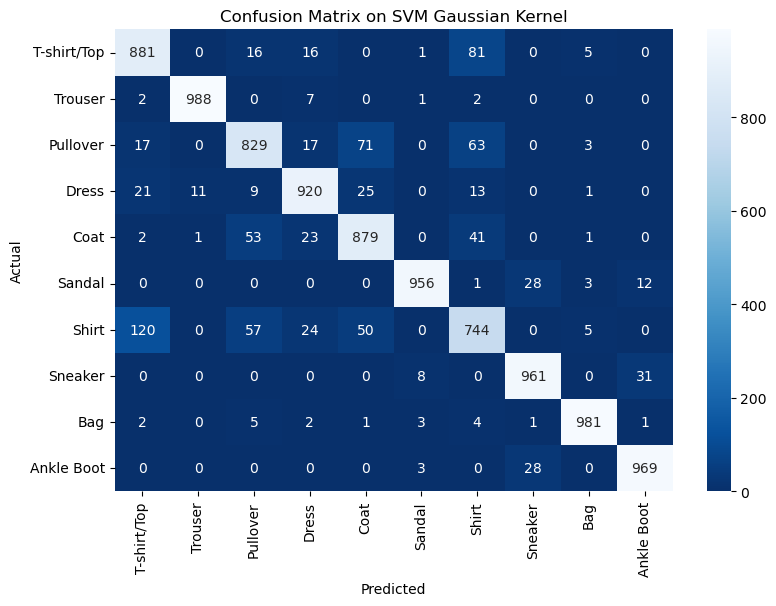

In [ ]:
# Confusion matrix for our chosen model
con_matrix = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(con_matrix, label, label)
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on SVM Gaussian Kernel")
sns.heatmap(df, cmap = "Blues_r", annot=True, fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

As shown in the confusion matrix, the Shirt class is the most misclassified, with misclassification adding up to around 250, this could be due to the fact that it is most similar to other classes such as T-shirt/Top, Pullover, etc.

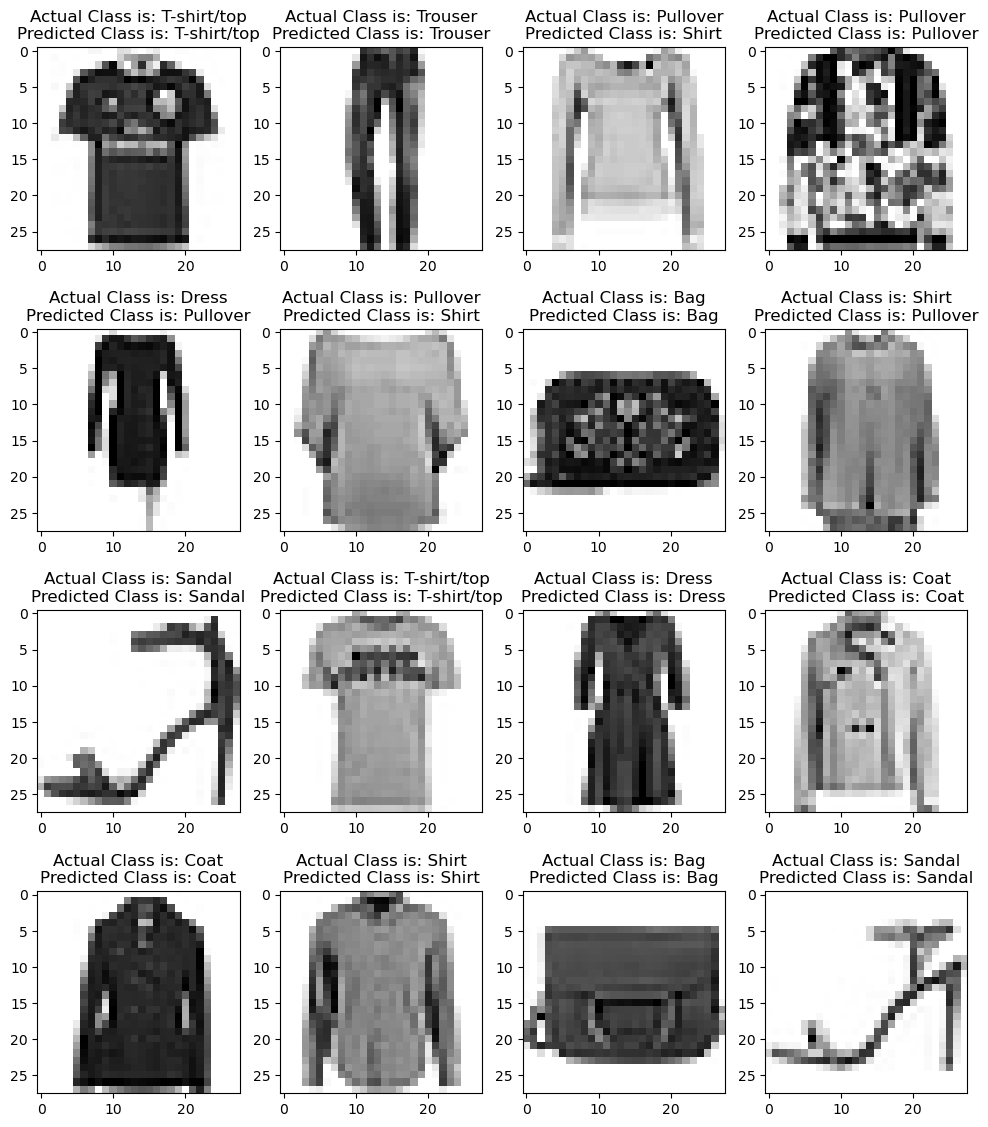

In [ ]:
# Helps in visualizing some of the actual image and the predicted using our chosen model
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

X_test1 = np.array(X_testpca).reshape(X_testpca.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(np.array(X_test1[i]).reshape((28,28)), cmap='binary')
    ax.set(title = f"Actual Class is: {labels[y_test[i]]}\nPredicted Class is: {labels[y_pred[i]]}")

We can see in images 3 and 6 that the actual class was supposed to be Pullover however our model classified it at a Shirt and vice versa for image 8